In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas_datareader as pdr
plt.style.use('dark_background')


In [107]:
tries = 0
while tries<3:
    temp = input()
    dayData = data[temp]
    print(dayData.index.size)
    if dayData.index.size == 1:
        day = temp
        print(data[temp])
        break
    tries += 1

2017-07-08
1
                        <TICKER>  <FIRST>   <HIGH>    <LOW>  <CLOSE>  \
<DTYYYYMMDD>                                                           
2017-07-08    Asan.Pardakht.Pers  26150.0  26472.0  25454.0  26087.0   

                  <VALUE>    <VOL>  <OPENINT> <PER>   <OPEN>   <LAST>  
<DTYYYYMMDD>                                                           
2017-07-08    48098744072  1843763        649     D  25452.0  26000.0  


In [3]:
data = pd.read_csv('Asan.Pardakht.Pers.csv', index_col='<DTYYYYMMDD>')
data.index = pd.to_datetime(data.index, format='%Y%m%d', errors='ignore')
print(data.describe())
close = data['<CLOSE>']

            <FIRST>        <HIGH>         <LOW>       <CLOSE>       <VALUE>  \
count    726.000000    726.000000    726.000000    726.000000  7.260000e+02   
mean   16268.157025  16472.351240  15961.516529  16214.756198  2.769737e+10   
std     3577.939878   3628.376977   3517.282688   3572.827195  4.916397e+10   
min     9999.000000   9999.000000   9999.000000   9999.000000  1.301400e+09   
25%    14165.000000  14265.000000  13901.000000  14092.500000  8.091584e+09   
50%    15268.500000  15400.000000  15003.000000  15195.000000  1.468535e+10   
75%    17189.250000  17289.500000  16945.000000  17078.750000  3.050998e+10   
max    27500.000000  27600.000000  26987.000000  27014.000000  8.255174e+11   

              <VOL>     <OPENINT>        <OPEN>        <LAST>  
count  7.260000e+02    726.000000    726.000000    726.000000  
mean   1.752260e+06   1089.133609  16170.252066  16197.279614  
std    3.826796e+06   1475.642833   3613.125030   3555.437898  
min    9.864200e+04     75.00000

In [3]:
ema1 = close.ewm(span=12).mean()
ema2 = close.ewm(span=26).mean()

In [4]:
def macd(array):
    ema1 = array.ewm(span=12, adjust=False).mean()
    ema2 = array.ewm(span=26, adjust=False).mean()
    mac = ema2-ema1
    mac_ema = mac.ewm(span=9, adjust=False).mean()
    return mac, mac_ema

In [5]:
def getRsi(arr, ema_size=14):
    print("Getting RSI...")
    arr = arr.diff()
    arr = arr[1:]
    up, down = arr.copy(), arr.copy()
    up[up<0] = 0
    down[down>0] = 0
    rollup = up.ewm(span=ema_size).mean()
    rolldown = np.abs(down).ewm(span=ema_size).mean()
    rs = rollup/rolldown
    rsi = 100 - (100/(1+rs))
#     print(up.size, up)
#     print(arr.size)
#     print(rollup.size, rollup)
    print("RSI Calculated")
    return rsi
#     print(rsi)

In [4]:
def slice_data(data,currentDay, period='10 day'):
    return data[currentDay:data.index.max()-pd.Timedelta(period)]

def slice_data_month(data,currentDay, period=3):
    return data[currentDay:data.index.max()-pd.DateOffset(months=period)]

def checkCF(data, day, share):
    max_ = data[day:].max()
    min_ = data[day:].min()
    print("Value:",data[day].values[0] ,"Max:", max_, "Min:",min_,"Difference:", max_-min_)
    if data[day].values[0]>max_:
        return 0
    elif data[day].values[0] < min_:
        return share
    sh = share / (max_-min_)
    value = share - sh*(data[day].values[0]-min_) 
    print("Value =>", value)
    return value
    space = np.linspace(share, 0, int(max_ - min_)+1)
    print("Space Created With:", data.size,"Days")
    return space[int(data[day]-min_)]

def checkRsi(data, day, ceil, floor, share):
    print("Checking RSI Between",ceil, ",",floor,"Maximum Share:", share)
    print("Value is:", data[day].values[0])
    if data[day].values[0]>ceil:
        return 0.0
    elif data[day].values[0]<floor:
        return share
    sh = share/(ceil-floor)
    value = share - sh*(data[day].values[0] - floor)
    print("Value =>",value)
    return value


In [241]:
rsi = getRsi(close)
# print("RSI:", rsi)
print("Value is: ",checkRsi(rsi, day, floor=20, ceil=80, share=20))

Getting RSI...
RSI Calculated
Checking RSI Between 80 , 20 Maximum Share: 20
Value is: 68.97306897171947
Value => 3.675643676093511
Value is:  3.675643676093511


In [5]:
def checkTV(data, day):
    print("Checking Transaction Volume")
    min_ = data[day:].min()
    mean = data[day:].mean()
    print("Minimum Transaction Specified Period:", min_)
    print("Mean Of Transactions:", mean)
    print("Checking", data[day].values[0])
    if data[day].values[0] > mean:
        return 10.0
    elif data[day].values[0] < min_:
        return 0.0;
    share = 10/(mean - min_)
    value = (data[day].values[0] - min_)*share
    print("Value =>", value)
    return value

In [188]:
y = slice_data_month(data['<VOL>'], 1)
print(type(y))

<class 'pandas.core.series.Series'>


In [10]:
tries = 0
while tries<3:
    temp = input()
    dayData = data[temp]
    print(dayData.index.size)
    if dayData.index.size == 1:
        day = temp
        print(data[temp])
        break
    tries += 1

2018-05-08
1
                        <TICKER>  <FIRST>   <HIGH>    <LOW>  <CLOSE>  \
<DTYYYYMMDD>                                                           
2018-05-08    Asan.Pardakht.Pers  17234.0  17288.0  17053.0  17201.0   

                 <VALUE>   <VOL>  <OPENINT> <PER>   <OPEN>   <LAST>  
<DTYYYYMMDD>                                                         
2018-05-08    8024869888  466159       2683     D  17146.0  17219.0  


In [230]:
# print("Checking ", day, data[day])
total = pd.Series(np.full(4, fill_value=0, dtype='float32'), np.array(['CF', 'RSI', 'TV', 'MACD']))
print(total)

CF      0.0
RSI     0.0
TV      0.0
MACD    0.0
dtype: float32


# 1. Check Ceil And Floor (40%)

In [248]:
cf = np.full(4, fill_value=0, dtype='float32')
data_3_month = slice_data_month(close,day, 3)
cf[0] = checkCF(data_3_month, day, 10)

data_6_month = slice_data_month(close,day, 6)
cf[1] = checkCF(data_6_month, day, 10)

data_1_year = slice_data(close,day, '1Y')
cf[2] = checkCF(data_1_year, day, 10)

data_2_year = slice_data(close,day, '2Y')
cf[3] = checkCF(data_2_year, day, 10)

results = cf.sum()
total['CF'] = results
print("Value of CF", results)
print("\n###################")
print(total)

Value: 15959.0 Max: 16932.0 Min: 12562.0 Difference: 4370.0
Value => 2.226544622425629
Value: 15959.0 Max: 17157.0 Min: 12562.0 Difference: 4595.0
Value => 2.6071817192600655
Value: 15959.0 Max: 17157.0 Min: 10722.0 Difference: 6435.0
Value => 1.8616938616938619
Value: 15959.0 Max: 18793.0 Min: 10722.0 Difference: 8071.0
Value => 3.5113368851443445
Value of CF 10.206757

###################
CF      10.206757
RSI      3.675644
TV       4.592318
MACD     0.000000
dtype: float32


# 2. Check RSI (20%)

In [249]:
rsi = getRsi(close)
print("RSI is:", rsi.head())
rsiResults = checkRsi(rsi, day, ceil=80, floor=20, share=20)
print("\nValue of RSI: ",rsiResults)
total['RSI'] = rsiResults
print("##################")
print(total)

Getting RSI...
RSI Calculated
RSI is: <DTYYYYMMDD>
2019-12-17    100.000000
2019-12-16     55.201138
2019-12-15     63.272837
2019-12-14     75.195331
2019-12-11     67.029111
Name: <CLOSE>, dtype: float64
Checking RSI Between 80 , 20 Maximum Share: 20
Value is: 68.97306897171947
Value => 3.675643676093511

Value of RSI:  3.675643676093511
##################
CF      10.206757
RSI      3.675644
TV       4.592318
MACD     0.000000
dtype: float32


# 3. Check Transaction Volume (20%)

In [263]:
volume = data['<VOL>']
print("Last Month Data: ",slice_data_month(volume,day, 1))
tv = checkTV(slice_data_month(data['<VOL>'],day, 1), day)
print("\nValue Of TV:",tv)
total['TV'] = tv
print("###########################")
print(total)

Last Month Data:  <DTYYYYMMDD>
2019-12-10     2993421
2019-12-09     2172484
2019-12-08     6980191
2019-12-07     2916200
2019-12-04    10994464
2019-12-03     2961427
2019-12-02     2564248
2019-12-01     1864996
2019-11-30     1683916
2019-11-27     1670801
2019-11-26      992763
2019-11-25     1734641
2019-11-24     2270984
2019-11-23     1795057
2019-11-20     2139870
2019-11-19     2195869
2019-11-18     1749310
Name: <VOL>, dtype: int64
Checking Transaction Volume
Minimum Transaction Specified Period: 992763
Mean Of Transactions: 2922390.705882353
Checking 2993421

Value Of TV: 10.0
###########################
CF      10.206757
RSI      3.675644
TV      10.000000
MACD     0.000000
dtype: float32


# 4. Check MACD (20%)

In [108]:

def emaDiff(data, long=26, short=12):
    short = data.ewm(span=short, adjust=False).mean()
    long = data.ewm(span=long, adjust=False).mean()
    diff = short - long
    print("Difference Calculated")
    diff[diff<0] = 0
    return diff

def checkEmaDiff(data, currentDay, share=10):
    data = data[pd.Timestamp(currentDay)-pd.DateOffset(days=7):currentDay]
    diff = data.diff(1)
    print(data)
    print(diff)
    value = 0
    for i in range(len(data)-1,-1, -1):
        if diff[i] < 0:
            return value
        elif diff[i] > diff[i-1]:
            value += 2.5
        else:
            return value
            
#     print(data)
    return value

In [109]:
print("Checking:",day)
print(checkEmaDiff(emaDiff(close), day, 10))

Checking: 2017-07-08
Difference Calculated
<DTYYYYMMDD>
2017-07-01     82.088806
2017-07-02     43.480603
2017-07-03     40.576962
2017-07-04     52.996309
2017-07-05    157.210939
2017-07-08    287.724271
Name: <CLOSE>, dtype: float64
<DTYYYYMMDD>
2017-07-01           NaN
2017-07-02    -38.608203
2017-07-03     -2.903641
2017-07-04     12.419347
2017-07-05    104.214630
2017-07-08    130.513332
Name: <CLOSE>, dtype: float64
7.5


In [111]:
def getMacd(array):
    ema1 = array.ewm(span=12, adjust=False).mean()
    ema2 = array.ewm(span=26, adjust=False).mean()
    macd = ema1-ema2
    signal = macd.ewm(span=9, adjust=False).mean()
    return macd, signal


In [110]:
# def checkMACD(data, share):
# def ExpMovingAverage(values, window):
#     weights = np.exp(np.linspace(-1., 0., window))
#     weights /= weights.sum()
#     a =  np.convolve(values, weights, mode='full')[:len(values)]
#     a[:window] = a[window]
#     return a

# plt.figure(figsize=(25,17))
# macd, signal = getMacd(close)
# plt.plot(macd, label='MACD')
# plt.plot(signal, label='Signal', color='red')
# plt.legend(loc=2)
# plt.show()
# d = close[:100]
# e = d.ewm(span=12, adjust=False).mean()
# e2 = ExpMovingAverage(d, 12)

# mc = ExpMovingAverage(d, 12) - ExpMovingAverage(d, 26)
# signal = ExpMovingAverage(mc, 9)

# z = d.copy()

# for k, i in enumerate(mc):
#     z[k] = i
# plt.plot(maci, label="MACD")

# z = d.copy()

# for k, i in enumerate(signal):
#     z[k] = i
# plt.plot(signali, label="SIGNAL", color='red')
# plt.plot(getMacd(d)[0], label="SIGNAL", color='orange')
# plt.plot(d, label='Close')
# plt.plot(e, label='an')
# plt.plot(z, label='EMA', color='red')
# plt.legend(loc=2)
# plt.show()


# Get Results

In [115]:
maci = pd.DataFrame(mc, pd.date_range('2019-07-22', freq='1D', periods=100))
signali = pd.DataFrame(signal, pd.date_range('2019-07-22', freq='1D', periods=100))


NameError: name 'mc' is not defined

In [7]:
close = close[::-1]

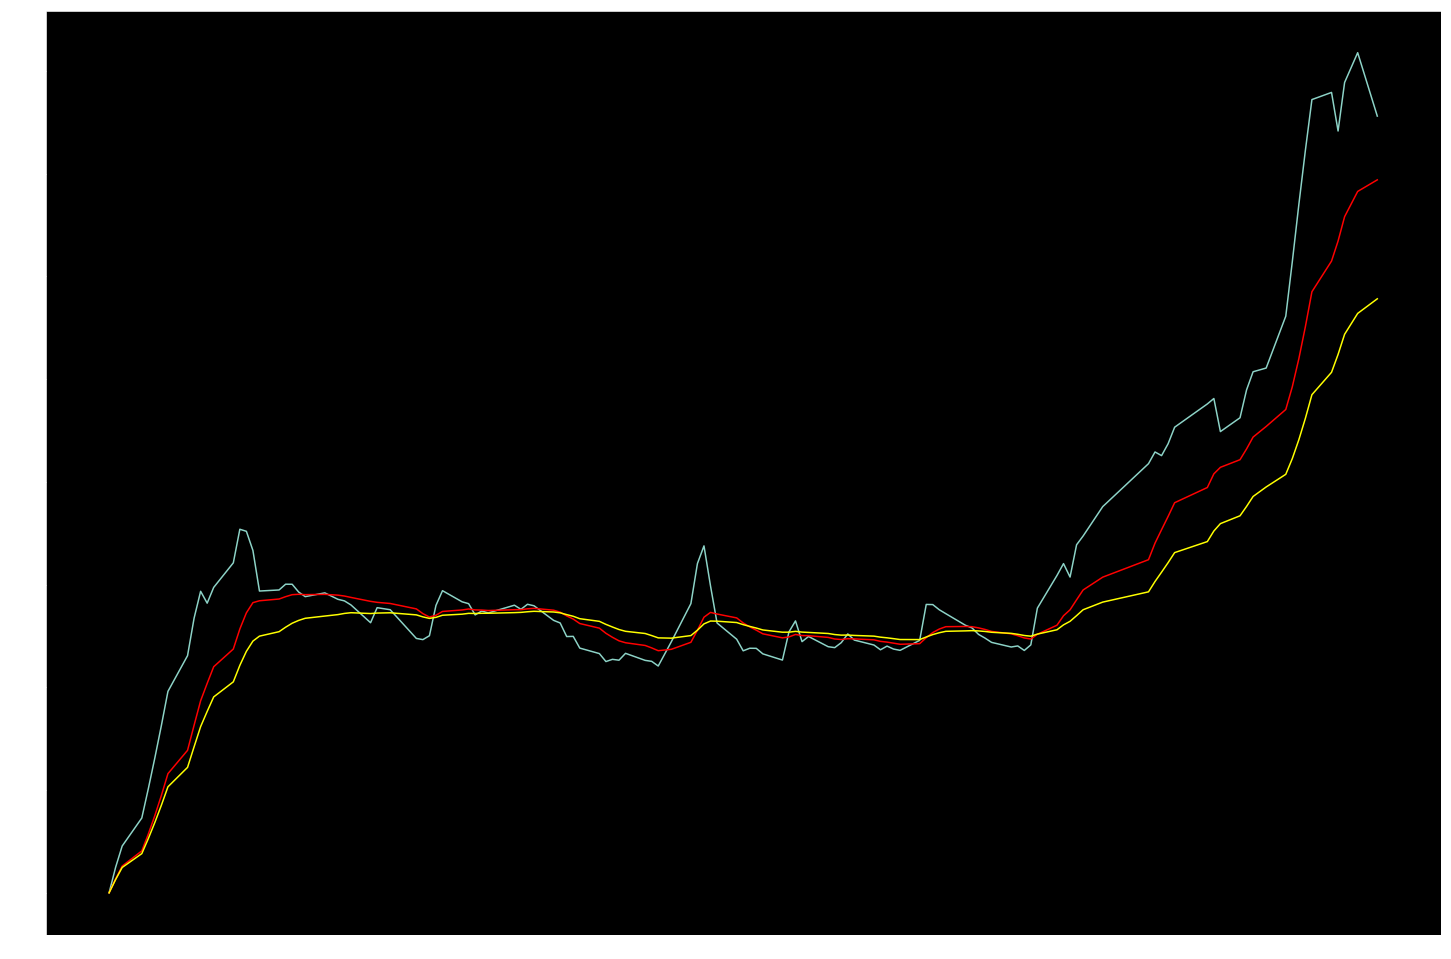

In [135]:
d = close[-800:-600]
plt.figure(figsize=(25,17))
plt.plot(d)
plt.plot(d.ewm(span=12).mean(), color='red')
plt.plot(d.ewm(span=26).mean(), color='yellow')
plt.show()

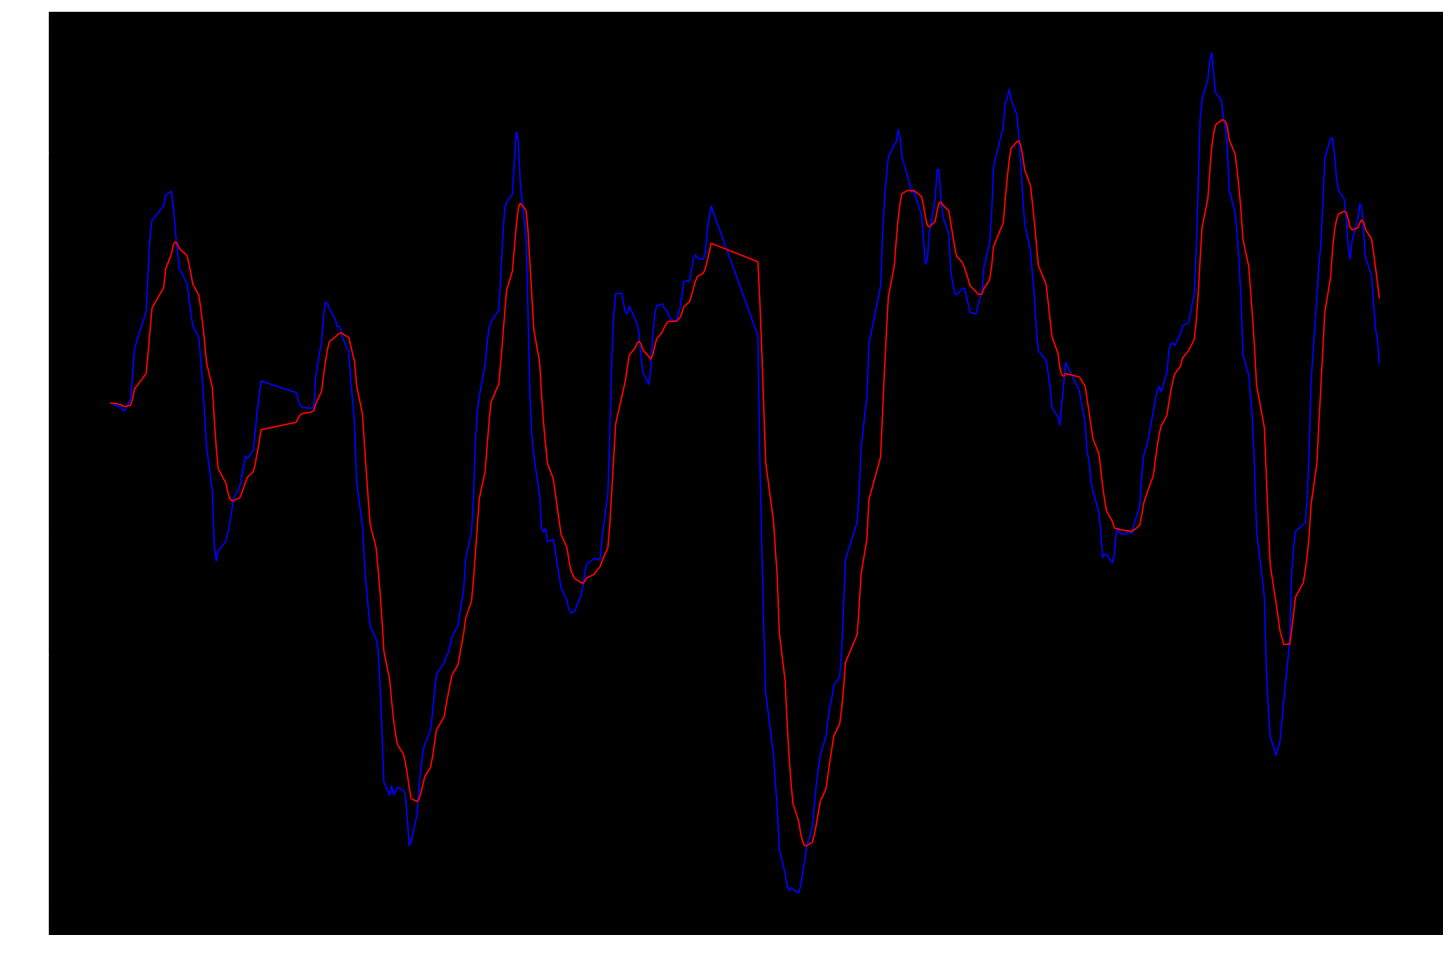

In [131]:
macd, signal = getMacd(d)
plt.figure(figsize=(25,17))
plt.plot(macd, color='blue')
plt.plot(signal, color='red')
plt.show()

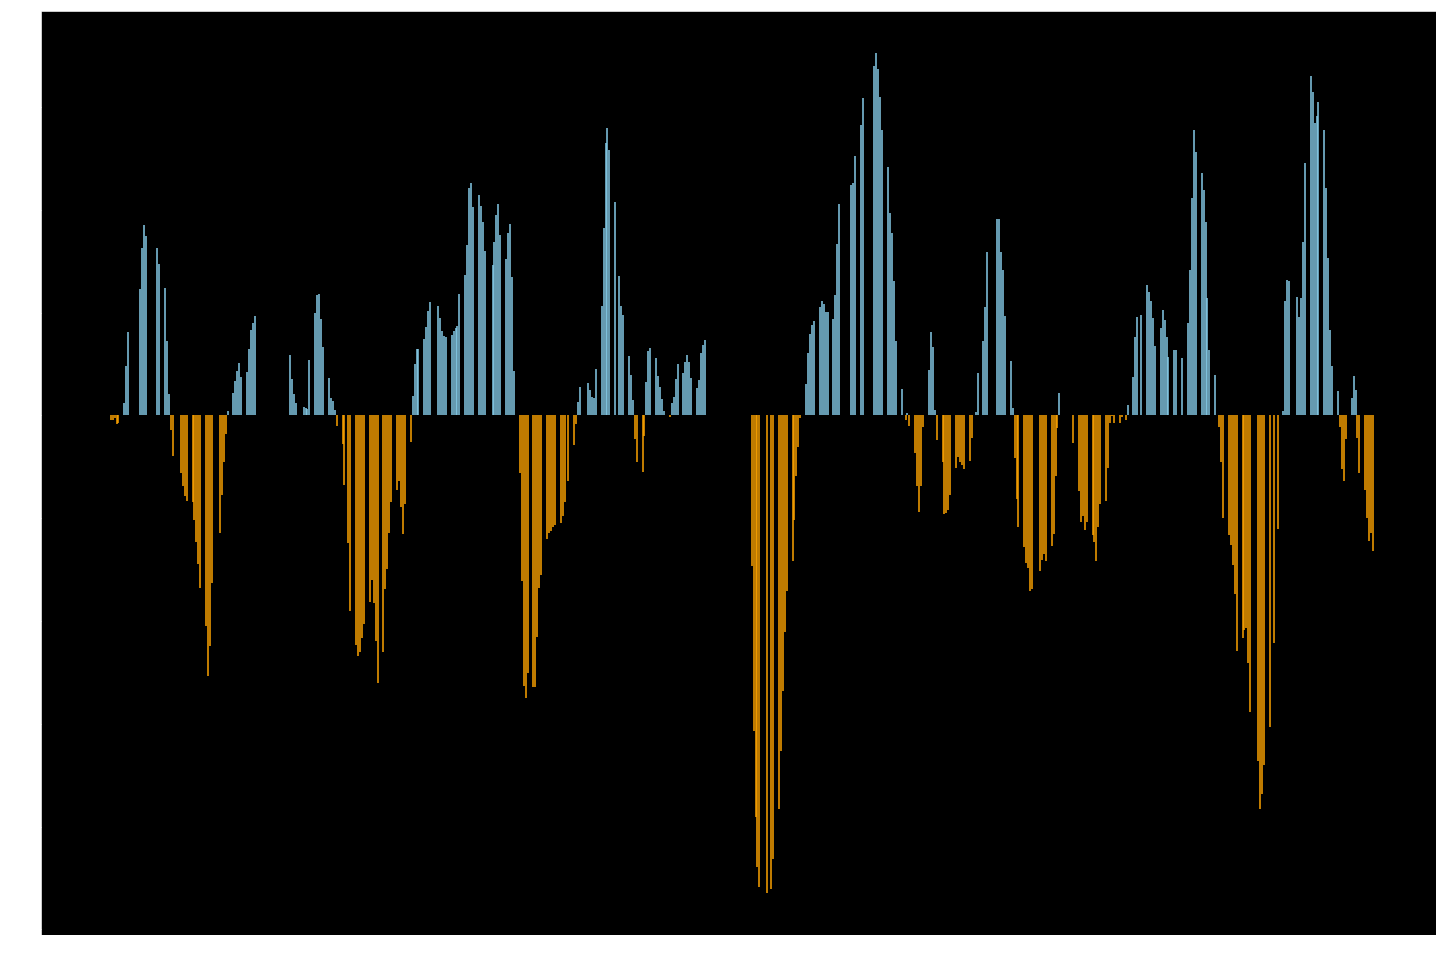

In [132]:
hist = macd - signal
plt.figure(figsize=(25,17))
my_color=np.where(hist.values>=0, 'skyblue', 'orange')
plt.vlines(x = hist.index, color=my_color, ymin=0, ymax=hist.values)
plt.show()

In [134]:
his = hist
for k, i in enumerate(his):
    if k == 0:
        continue
    if i > 0 and his[k-1] <= 0:
        print("Buy Signal in: ",his.index[k])
    elif i<= 0 and his[k-1] > 0:
        print("Sell Signal in: ",his.index[k])

Buy Signal in:  2018-03-17 00:00:00
Sell Signal in:  2018-04-10 00:00:00
Buy Signal in:  2018-05-09 00:00:00
Sell Signal in:  2018-07-04 00:00:00
Buy Signal in:  2018-08-12 00:00:00
Sell Signal in:  2018-10-06 00:00:00
Buy Signal in:  2018-11-05 00:00:00
Sell Signal in:  2018-12-04 00:00:00
Buy Signal in:  2018-12-10 00:00:00
Sell Signal in:  2018-12-22 00:00:00
Buy Signal in:  2018-12-23 00:00:00
Sell Signal in:  2019-02-02 00:00:00
Buy Signal in:  2019-03-02 00:00:00
Sell Signal in:  2019-04-22 00:00:00
Buy Signal in:  2019-04-23 00:00:00
Sell Signal in:  2019-04-24 00:00:00
Buy Signal in:  2019-05-04 00:00:00
Sell Signal in:  2019-05-08 00:00:00
Buy Signal in:  2019-05-28 00:00:00
Sell Signal in:  2019-06-17 00:00:00
Buy Signal in:  2019-07-10 00:00:00
Sell Signal in:  2019-07-17 00:00:00
Buy Signal in:  2019-08-14 00:00:00
Sell Signal in:  2019-09-30 00:00:00
Buy Signal in:  2019-11-02 00:00:00
Sell Signal in:  2019-12-01 00:00:00
Buy Signal in:  2019-12-07 00:00:00
Sell Signal in:

In [92]:
for k, i in enumerate(macd):
    if k == 0:
        continue
    if i >= 0 and macd[k-1] < 0:
        print("Buy Signal in: ",macd.index[k])
    elif i<= 0 and macd[k-1] > 0:
        print("Sell Signal in: ",macd.index[k])

Buy Signal in:  2018-03-17 00:00:00
Sell Signal in:  2018-04-24 00:00:00
Buy Signal in:  2018-05-22 00:00:00
Sell Signal in:  2018-06-12 00:00:00
Buy Signal in:  2018-06-20 00:00:00
Sell Signal in:  2018-07-10 00:00:00
Buy Signal in:  2018-09-12 00:00:00
Sell Signal in:  2018-10-09 00:00:00
Buy Signal in:  2018-11-19 00:00:00
Sell Signal in:  2019-02-03 00:00:00


In [129]:
# di = emaDiff(close)
# di[di<0] = 0
# di = di['2017-06-20':'2017-07'].diff()
# di
# plt.figure(figsize=(25,27))
# plt.plot(di)
# plt.show()

KeyError: '2019-5-3'